# Load an image and measure shape of objects in 3D
!pip install pyclesperanto-prototype napari-simpleitk-image-processing

In [1]:
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import label_statistics

cl.OCLArray([[[5311., 4458., 5880., ..., 4220., 6497., 4932.],
        [4078., 4552., 3557., ..., 4552., 4884., 5169.],
        [3414., 5074., 4363., ..., 4078., 6117., 5406.],
        ...,
        [3983., 3983., 2750., ..., 4410., 4600., 5880.],
        [3604., 4173., 4600., ..., 5548., 5690., 4268.],
        [4078., 4268., 4220., ..., 5359., 6686., 7492.]],

       [[4220., 4932., 5074., ..., 6449., 6117., 4932.],
        [3082., 4979., 4505., ..., 4505., 6971., 5880.],
        [4695., 4315., 4695., ..., 4742., 5785., 5074.],
        ...,
        [3414., 3841., 3462., ..., 5169., 4742., 5027.],
        [4173., 3319., 2798., ..., 5406., 4600., 4837.],
        [3225., 3557., 3651., ..., 5453., 5406., 4837.]],

       [[4552., 4505., 4742., ..., 4458., 4979., 4647.],
        [3367., 4268., 4647., ..., 6402., 6022., 5738.],
        [3509., 3272., 4647., ..., 5264., 4220., 6259.],
        ...,
        [3841., 3936., 3888., ..., 4884., 5169., 4789.],
        [3604., 3225., 2798., ..., 4552., 6117., 5690.],
        [4126., 4458., 4837., ..., 5928., 6734., 5027.]],

       ...,

       [[5121., 5833., 5738., ..., 5406., 3983., 4220.],
        [5311., 5453., 5453., ..., 5169., 5027., 4884.],
        [6544., 5121., 5264., ..., 4363., 5406., 4695.],
        ...,
        [4884., 2324., 3130., ..., 4552., 4979., 6070.],
        [3225., 2513., 2513., ..., 4742., 3035., 2418.],
        [3272., 2798., 3888., ..., 3604., 4268., 3746.]],

       [[5359., 5928., 5738., ..., 4268., 4505., 4031.],
        [7445., 6829., 4268., ..., 4884., 5596., 3082.],
        [6497., 6544., 4932., ..., 3604., 5359., 4410.],
        ...,
        [5833., 2703., 3367., ..., 3177., 4220., 4220.],
        [4031., 3509., 5216., ..., 4268., 3604., 4932.],
        [3557., 2987., 3936., ..., 3604., 3462., 5264.]],

       [[6402., 6781., 4789., ..., 5928., 6022., 3651.],
        [4363., 4837., 6307., ..., 4315., 3651., 4126.],
        [4979., 4695., 4742., ..., 4789., 4837., 4552.],
        ...,
        [4078., 2513., 3035., ..., 1849., 3888., 4363.],
        [3936., 3888., 4315., ..., 5216., 4031., 5643.],
        [4173., 4505., 3794., ..., 4979., 6781., 4031.]]], dtype=float32)
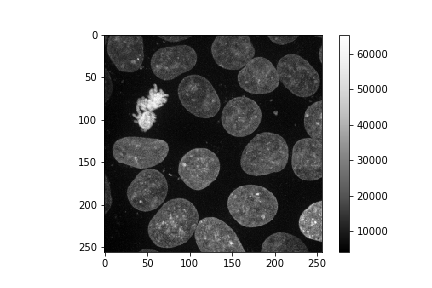

In [2]:
# Load image from disk
image = cle.imread("../../data/cells3d_nuclei.tif")
image

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
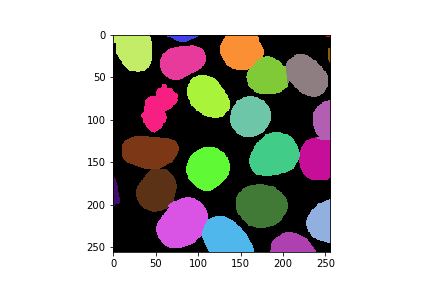

In [3]:
# Segment nuclei
labeled_nuclei = cle.voronoi_otsu_labeling(image, spot_sigma=9, outline_sigma=2)
labeled_nuclei

In [4]:
# Exclude nuclei from image border
full_labeled_nuclei = cle.exclude_labels_on_edges(labeled_nuclei)
full_labeled_nuclei

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)

In [5]:
# measure shape of nuclei in 3D
shape_statistics = label_statistics(image, full_labeled_nuclei, 
                                    intensity=False, 
                                    size=False,
                                    shape=True,
                                    perimeter=False,
                                    position=False,
                                    moments=False,
                                    )
shape_statistics

label  elongation  feret_diameter  flatness  roundness
0       1    1.653587       67.029844  1.349064   0.872756
1       2    1.177563       52.392748  1.474891   0.909466
2       3    1.547676       55.380502  1.222433   0.932769
3       4    1.301550       65.673435  1.642099   0.882964
4       5    1.053335       53.413481  1.596576   0.949405
5       6    1.445665       56.692151  1.372442   0.840885
6       7    1.048942       49.254441  1.472442   0.954126
7       8    1.200104       61.073726  1.784737   0.912368
8       9    1.099592       50.931326  1.504624   0.930952
9      10    1.237608       60.679486  1.735148   0.894266
10     11    1.438093       56.938563  1.488114   0.792592